<a href="https://colab.research.google.com/github/Kennyz2004/DA-Project--Predicting-Student-Dropout-and-Academic-Success/blob/main/scholarProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Mounting

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ColabNotebook3rd2nd/dataset.csv')

## Checking on Data

In [ ]:
 df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#get info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
#check for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
#shape is to give number of rows 0 and columns 1
#to list is the names of column

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

#unique
print ("\nUnique values :  \n",df.nunique())

#gets the sum of missing values
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  4424
Columns  :  35

Features : 
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

Unique values :  
 

## Pre-processing Data

### What Are Our Data Quality Issues?

**Data Quality Issue #1**:
> **Categorical Columns**:  The feature column "Target" is categorical and has the choices of "Graduate," "Dropout," and "Enrolled."  These values cannot be fed like this into a machine learning model.  There is a need to one-hot encode this column.

Note: this will be done during the machine learning section as to keep visualization of current code


**Data Quality Issue #2**:
Rename the features for uniformity

In [ ]:
#fixing columsn to not have them mixed
# have eveything in lovwercase and remove spaces
# TODO 3a
# TODO -- Your code here.
df.rename(columns = {'Marital status': 'maritalstatus', 'Application mode': 'applicationmode', 'Application order': 'applicationorder', 'Course': 'course', 'Daytime/evening attendance': 'daytime/eveningattendance', 'Previous qualification': 'previousqualification',
                     'Nacionality': 'nationality', 'Mother\'s qualification': 'mothersqualification', 'Father\'s qualification': 'fathersqualification', 'Mother\'s occupation': 'mothersoccupation', 'Father\'s occupation': 'fathersoccupation',
                     'Displaced': 'displaced', 'Educational special needs': 'educationalspecialneeds', 'Debtor': 'debtor', 'Curricular units 2nd sem (credited)': 'curricularunits2ndsem(credited)', 'Curricular units 2nd sem (enrolled)': 'curricularunits2ndsem(enrolled)', 'Curricular units 2nd sem (approved)': 'curricularunits2ndsem(approved)', 'Curricular units 2nd sem (grade)': 'curricularunits2ndsem(grade)', 'Curricular units 2nd sem (evaluations)': 'curricularunits2ndsem(evaluations)', 'Curricular units 2nd sem (without evaluations)': 'curricularunits2ndsem(withoutevaluations)', 'Unemployment rate': 'unemploymentrate', 'Inflation rate': 'inflationrate',
                     'GDP': 'gdp', 'Tuition fees up to date': 'tuitionfeesuptodate', 'Gender': 'gender', 'Scholarship holder': 'scholarshipholder', 'International': 'international', 'curricular units 2nd sem (credited)': 'curricularunits2ndsem(credited)','Target': 'target'}, inplace = True)
df.head(2)


,maritalstatus,applicationmode,applicationorder,course,daytime/eveningattendance,previousqualification,nationality,mothersqualification,fathersqualification,mothersoccupation,...,curricularunits2ndsem(credited),curricularunits2ndsem(enrolled),curricularunits2ndsem(evaluations),curricularunits2ndsem(approved),curricularunits2ndsem(grade),curricularunits2ndsem(withoutevaluations),unemploymentrate,inflationrate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [ ]:
#copy code for machine learning algorithm
dfMachine = df.copy()

In [ ]:
df.head(200)

,maritalstatus,applicationmode,applicationorder,course,daytime/eveningattendance,previousqualification,nationality,mothersqualification,fathersqualification,mothersoccupation,...,curricularunits2ndsem(credited),curricularunits2ndsem(enrolled),curricularunits2ndsem(evaluations),curricularunits2ndsem(approved),curricularunits2ndsem(grade),curricularunits2ndsem(withoutevaluations),unemploymentrate,inflationrate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,12,1,17,0,15,1,13,1,4,...,0,5,0,0,0.000000,0,8.9,1.4,3.51,Dropout
196,1,9,6,12,1,1,1,22,27,6,...,0,8,8,8,12.933750,0,9.4,-0.8,-3.12,Graduate
197,1,4,1,7,1,3,1,3,2,3,...,0,5,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
198,1,1,1,16,1,1,1,13,14,4,...,0,7,8,7,14.428571,0,11.1,0.6,2.02,Graduate


In [ ]:
#check if any nulls: none
df.isnull().sum()

maritalstatus                                     0
applicationmode                                   0
applicationorder                                  0
course                                            0
daytime/eveningattendance                         0
previousqualification                             0
nationality                                       0
mothersqualification                              0
fathersqualification                              0
mothersoccupation                                 0
fathersoccupation                                 0
displaced                                         0
educationalspecialneeds                           0
debtor                                            0
tuitionfeesuptodate                               0
gender                                            0
scholarshipholder                                 0
Age at enrollment                                 0
international                                     0
Curricular u

There is no null text in the dataset

Turn code into numerical (hot code the dataset later)

In [ ]:
print(df["target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [ ]:
df['target'] = df['target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

## Exploratory Data analysis

## Getting  correlation

In [ ]:
df.corr()['target']

maritalstatus                                    -0.089804
applicationmode                                  -0.212025
applicationorder                                  0.089791
course                                            0.007841
daytime/eveningattendance                         0.075107
previousqualification                            -0.091365
nationality                                      -0.004740
mothersqualification                             -0.038346
fathersqualification                              0.000329
mothersoccupation                                 0.048424
fathersoccupation                                 0.051702
displaced                                         0.113986
educationalspecialneeds                          -0.007353
debtor                                           -0.240999
tuitionfeesuptodate                               0.409827
gender                                           -0.229270
scholarshipholder                                 0.2975

<Axes: >

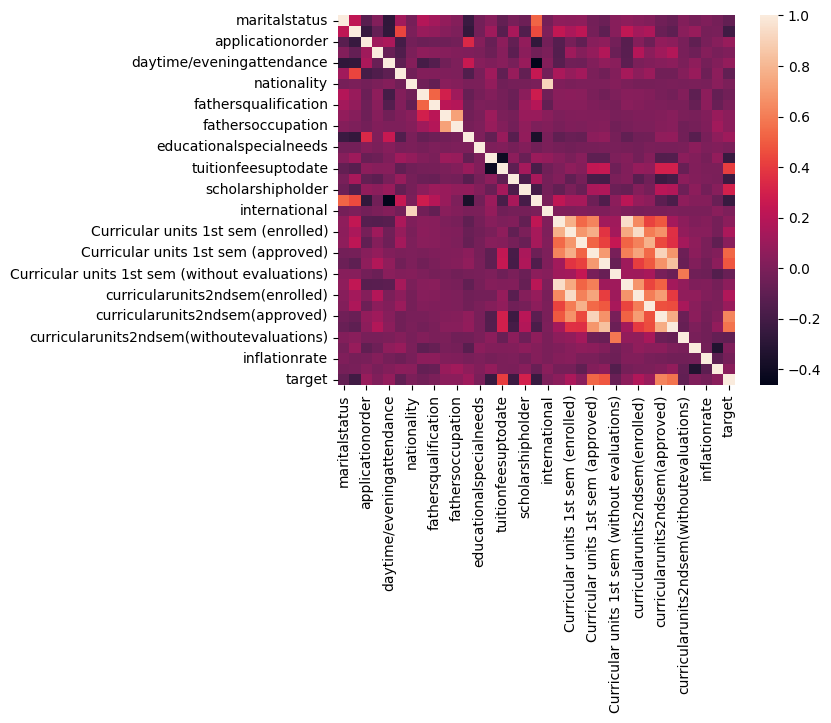

In [ ]:
#Visualization of correlation
sns.heatmap(df.corr())

## Summary of top 10 correlation

what is best in correlation

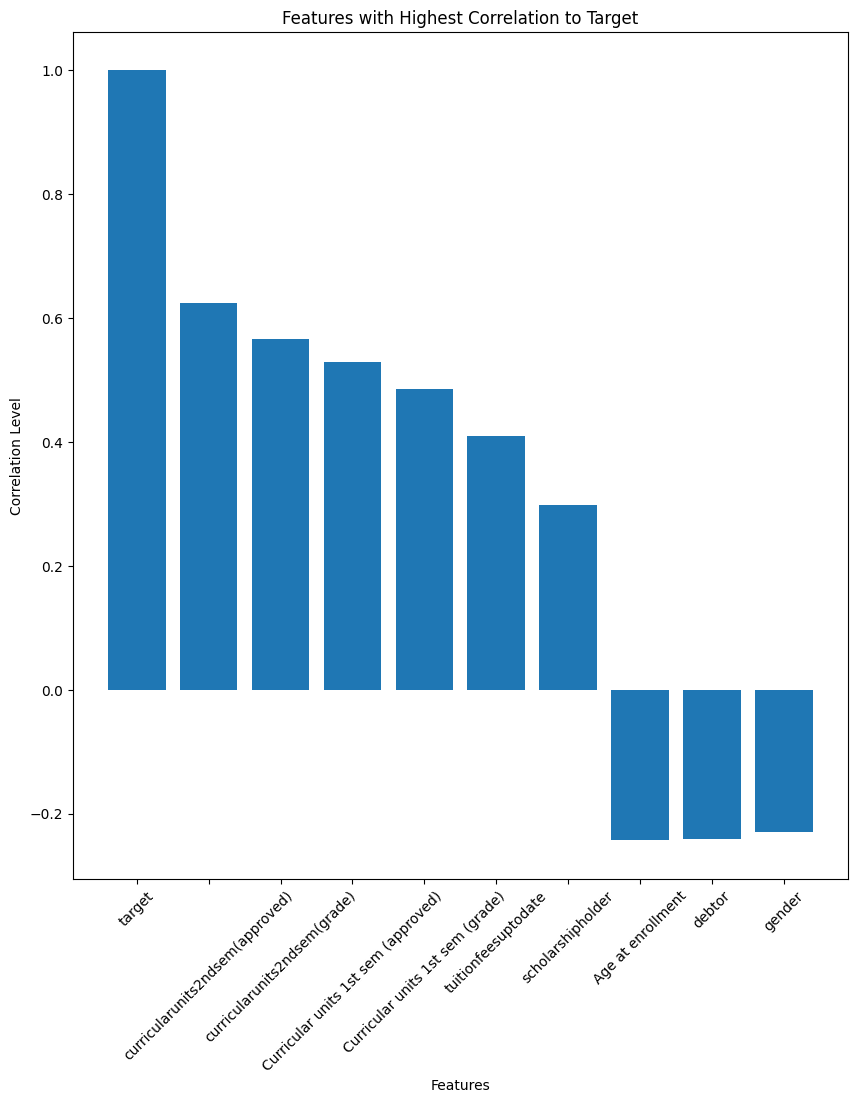

In [ ]:
correlations = df.corr()['target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation Level')
plt.title('Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

## Ratio of target (graduate, dropout, enrolled) in dataset

In [ ]:
donut= df['target'].value_counts()
print(donut.to_string(index=False))

2209
1421
 794


In [ ]:
x = df['target'].value_counts().index
y = df['target'].value_counts().values
print(y)

[2209 1421  794]


Text(0.5, 1.0, 'Results of Target column (dropout,graduates, & enrolled)')

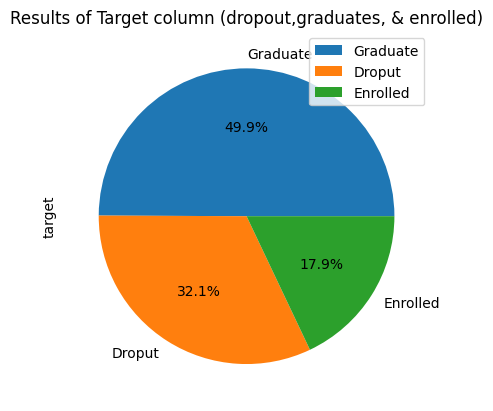

In [ ]:
mylabels= ['Graduate', 'Droput', 'Enrolled']
donutimg= donut.plot(kind='pie', legend=True, labels=mylabels, autopct='%.1f%%')
donutimg.set_title("Results of Target column (dropout,graduates, & enrolled)")
#1 enrolled 2 graduate 0 dropout

Distribution and relationship of a feature to target

In [ ]:
px.histogram(df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['lightblue'])

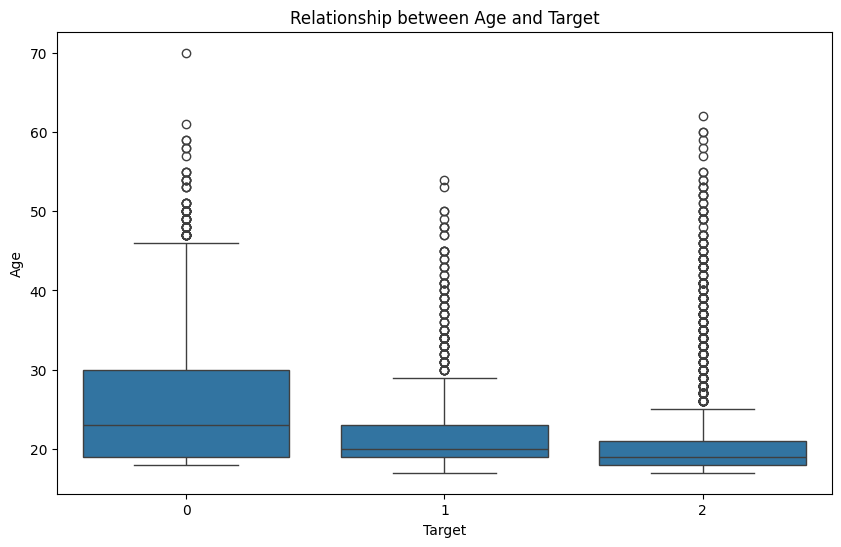

In [ ]:
#creating boxplot on the relationship between age and target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Age at enrollment', data=df, )
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()
#1 enrolled 2 graduate 0 dropout

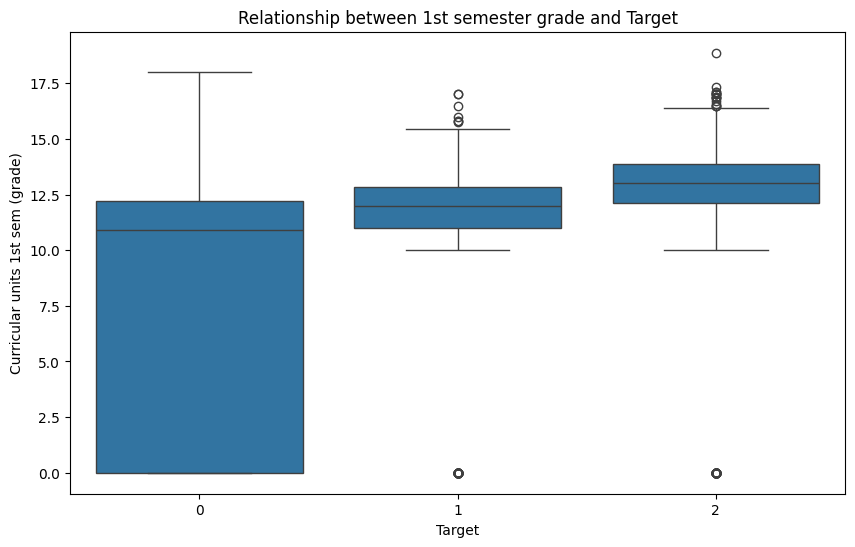

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Curricular units 1st sem (grade)', data=df)
plt.xlabel('Target')
plt.ylabel('Curricular units 1st sem (grade)')
plt.title('Relationship between 1st semester grade and Target')
plt.show()
#1 enrolled 2 graduate 0 dropout

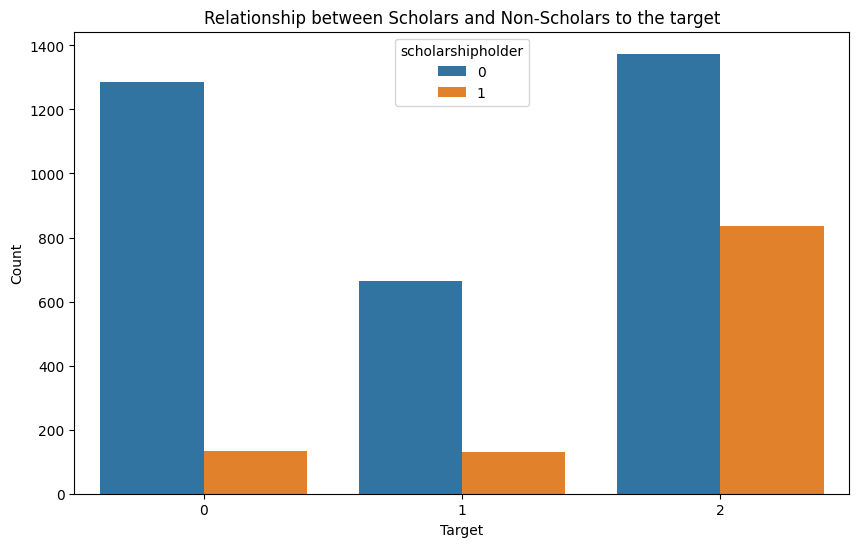

In [ ]:
#Relationship between Scholars and Non-Scholars to the target
mydf = df[['target','scholarshipholder']]
plt.figure(figsize=(10, 6))
sns.countplot(x="target", hue="scholarshipholder", data=mydf)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Relationship between Scholars and Non-Scholars to the target')
plt.show()
# Scholarship_Holder : 0 = Non-scholar , 1 = Scholar
# Target : 0 = Dropout , 1 = Enrolled , 2 = Graduate

## Training a Linear Regression Model (WILL NOT BE PART OF THE 2ND DELIVERABLE)

## One hot encoding

In [ ]:
dfMachine.head()

,maritalstatus,applicationmode,applicationorder,course,daytime/eveningattendance,previousqualification,nationality,mothersqualification,fathersqualification,mothersoccupation,...,curricularunits2ndsem(credited),curricularunits2ndsem(enrolled),curricularunits2ndsem(evaluations),curricularunits2ndsem(approved),curricularunits2ndsem(grade),curricularunits2ndsem(withoutevaluations),unemploymentrate,inflationrate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data_dummy = pd.get_dummies(dfMachine[['target']], drop_first=False)
data_dummy.head()

,target_Dropout,target_Enrolled,target_Graduate
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [ ]:
dfMachine=pd.concat([dfMachine,data_dummy], axis=1)
dfMachine.head()


,maritalstatus,applicationmode,applicationorder,course,daytime/eveningattendance,previousqualification,nationality,mothersqualification,fathersqualification,mothersoccupation,...,curricularunits2ndsem(approved),curricularunits2ndsem(grade),curricularunits2ndsem(withoutevaluations),unemploymentrate,inflationrate,gdp,target,target_Dropout,target_Enrolled,target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,0,1
2,1,1,5,5,1,1,1,22,27,10,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0,1


In [ ]:
dfMachine = dfMachine.drop(['target'], axis=1)
dfMachine.head()

,maritalstatus,applicationmode,applicationorder,course,daytime/eveningattendance,previousqualification,nationality,mothersqualification,fathersqualification,mothersoccupation,...,curricularunits2ndsem(evaluations),curricularunits2ndsem(approved),curricularunits2ndsem(grade),curricularunits2ndsem(withoutevaluations),unemploymentrate,inflationrate,gdp,target_Dropout,target_Enrolled,target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1


## Linear Regression Model

In [ ]:
### X and y arrays
#UPDATE IF RENAME IS DONE TO FEATURES
X = df[['maritalstatus', 'applicationmode', 'applicationorder', 'course', 'daytime/eveningattendance', 'previousqualification',
        'nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced',
        'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
        'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
        'Curricularunits2ndsem(credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)',
        'unemploymentrate', 'inflationrate', 'GDP']]
y = df['Curricular units 2nd sem (grade)']

KeyError: '["Mother\'s qualification", "Father\'s qualification", "Mother\'s occupation", "Father\'s occupation", \'Displaced\', \'Educational special needs\', \'Debtor\', \'Tuition fees up to date\', \'Gender\', \'Scholarship holder\', \'International\', \'Curricularunits2ndsem(credited)\', \'Curricular units 2nd sem (enrolled)\', \'Curricular units 2nd sem (evaluations)\', \'Curricular units 2nd sem (approved)\', \'Curricular units 2nd sem (without evaluations)\', \'GDP\'] not in index'

In [ ]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
# Import LinearRegression function from sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets
# in the dataset, and the targets predicted by the linear approximation.
lm = LinearRegression()

In [ ]:
# Train the Linear Regression Classifer
lm.fit(X_train,y_train) # TODO 3

In [ ]:
# print the intercept
print(lm.intercept_)
#value of the bias

In [ ]:
# Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

#different weights of the different features

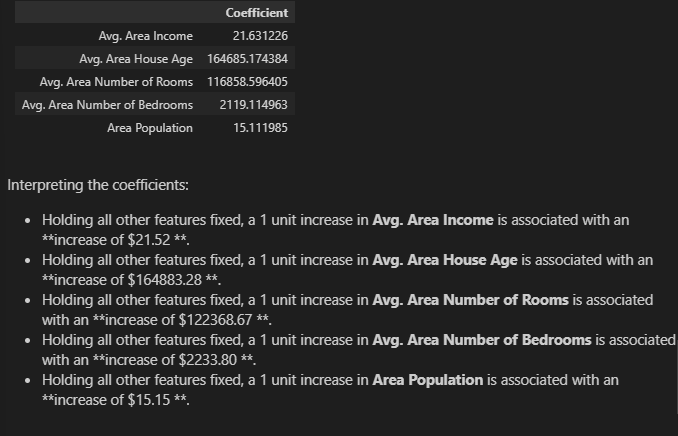

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot((y_test-predictions),bins=50);

#residual is following a normal distribution

## Exploring the Data


<Axes: >

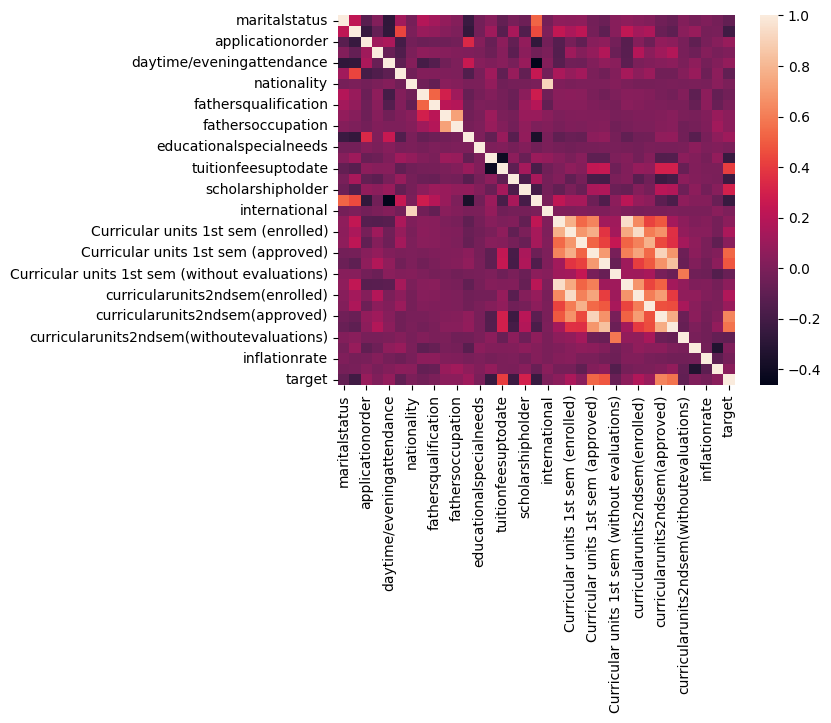

In [ ]:
# find pairwise correlation of all columns in the dataframe
sns.heatmap(df.corr())

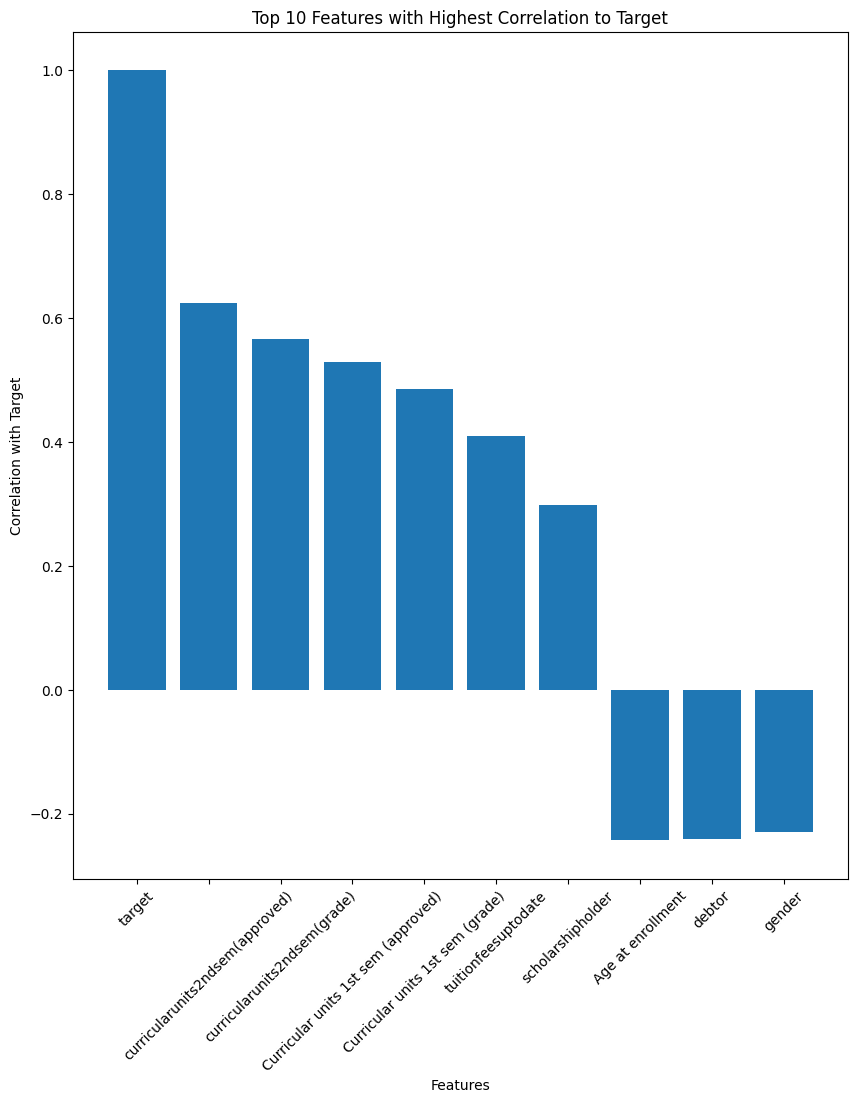

In [ ]:
# show features with highest correlation to target variable
correlations = df.corr()['target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

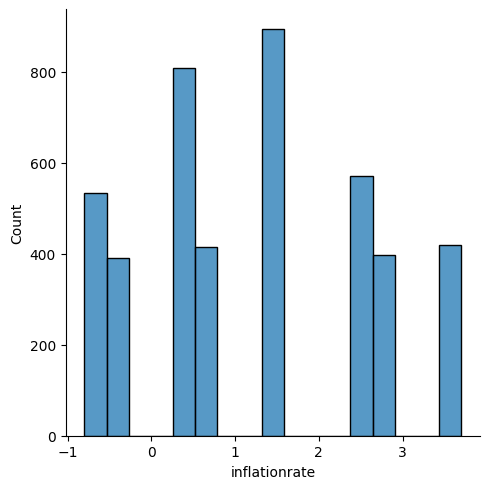

In [ ]:
# display inflation rate as a histogram
sns.displot(df['inflationrate'])

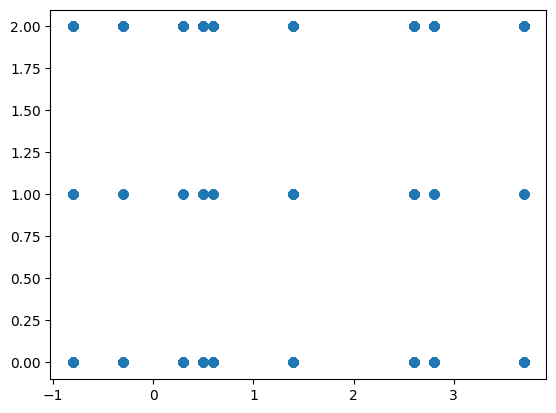

In [ ]:
# try to find meaningful relationship between two features (NEED TO CHOOSE OTHER FEATURES)
x = df['inflationrate']
y = df['target']

plt.scatter(x, y)
plt.show()

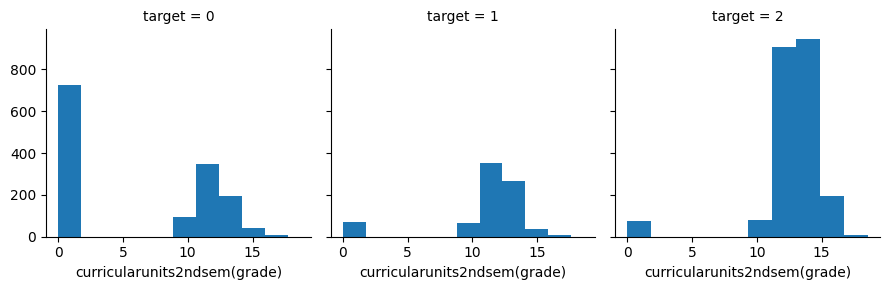

In [ ]:
g = sns.FacetGrid(df, col="target")
g.map(plt.hist, "curricularunits2ndsem(grade)");

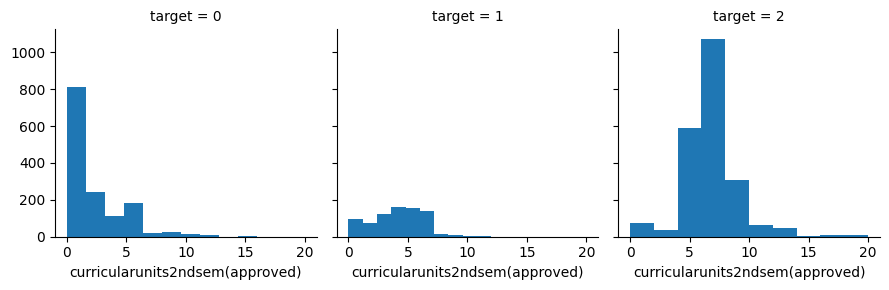

In [ ]:
g = sns.FacetGrid(df, col="target")
g.map(plt.hist, "curricularunits2ndsem(approved)");